## Recommender System by Correlation of User Reviews

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
% matplotlib inline

In [2]:
sns.set_style('white')

## Loading the  Data

This is the "small" data set from:<br> 
<https://grouplens.org/datasets/movielens/>


In [3]:
column_names = ['user_id', 'item_id', 'rating','timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)


In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


The movie titles are stored in a seperate file, we can combine them on item_id.

In [5]:
titles = pd.read_csv('Movie_Id_Titles')

In [6]:
titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
df = pd.merge(df, titles, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## Exploratory Data Analysis

Finding the average rating per movie.

In [8]:
print "---Top Twenty Highest Rated Movies----"
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(20)

---Top Twenty Highest Rated Movies----


title
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Prefontaine (1997)                                        5.000000
Santa with Muscles (1996)                                 5.000000
Star Kid (1997)                                           5.000000
Someone Else's America (1995)                             5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Saint of Fort Washington, The (1993)                      5.000000
Great Day in Harlem, A (1994)                             5.000000
They Made Me a Criminal (1939)                            5.000000
Aiqing wansui (1994)                                      5.000000
Pather Panchali (1955)                                    4.625000
Anna (1996)                                               4.500000
Everest (1998)                                            4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Some Mother's Son (1996)                                

In [9]:
print "---Top Twenty Most Rated Movies---"
df.groupby('title')['rating'].count().sort_values(ascending=False).head(20)

---Top Twenty Most Rated Movies---


title
Star Wars (1977)                    584
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Jerry Maguire (1996)                384
Chasing Amy (1997)                  379
Rock, The (1996)                    378
Empire Strikes Back, The (1980)     368
Star Trek: First Contact (1996)     365
Name: rating, dtype: int64

In [10]:
df[df['title']=='Prefontaine (1997)' ]['rating'].count()

3

We see that some movies with the highest ratings, do not have very many ratings.  The tale of the track star turned olympian "Prefontaine (1997)", is running away with a high rating score, but is limping in with only 3 ratings.  While the force is with "Star Wars (1977)" in popularity, it doesn't shoot first in the ratings department.

In [11]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [12]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [13]:
ratings['Num_of_Ratings'] = df.groupby('title')['rating'].count()

In [14]:
ratings.head()

,rating,Num_of_Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


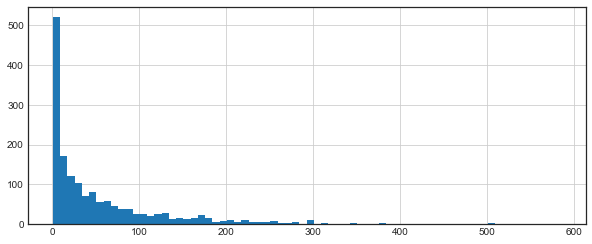

In [15]:
ratings['Num_of_Ratings'].hist(bins=70, figsize=(10,4))

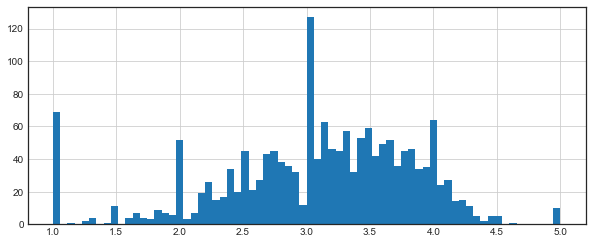

In [16]:
ratings['rating'].hist(bins=70, figsize=(10,4))

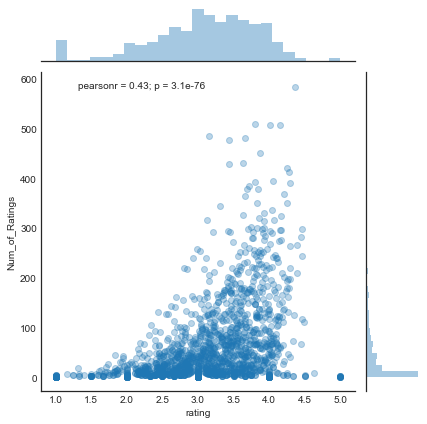

In [17]:
sns.jointplot(x='rating',y='Num_of_Ratings',data=ratings, alpha=0.3)

So we have many ratings between 2 to 4, that go up in the amount of ratings provided.  After 4 star ratings, their is a drop of in the amount of ratings recieved for these higher rated movies. 

## Recomender System

Most recommender system will have to deploy some type of matrix to evaluate similarites.  Here we will create a matrix of user rows and movie columns, the elements being the rating each user gave.  This matrix will be sparse with data, since not everyone will have seen every movie, or some users may have rated only one movie.

In [18]:
ratings_matrix = df.pivot_table(index='user_id', columns='title', values='rating')

In [19]:
ratings_matrix.head().head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
ratings.sort_values('Num_of_Ratings', ascending=False).head(10)

,rating,Num_of_Ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Lets find recommendations similar to "Scream (1996)"

In [21]:
scream_ratings = ratings_matrix['Scream (1996)']
scream_ratings.head()

user_id
0    NaN
1    NaN
2    3.0
3    2.0
4    4.0
Name: Scream (1996), dtype: float64

The function corrwith() can find the correlation between two pandas series.

In [22]:
similar_to_scream = ratings_matrix.corrwith(scream_ratings)

/Users/jeffdougherty/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/jeffdougherty/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [23]:
corr_scream = pd.DataFrame(similar_to_scream, columns=['Correlation'])
corr_scream.dropna(inplace=True)
corr_scream.head()

,Correlation
title,
'Til There Was You (1997),0.454859
1-900 (1994),-0.944911
101 Dalmatians (1996),0.124059
12 Angry Men (1957),-0.025659
187 (1997),0.382836


In [24]:
corr_scream.sort_values('Correlation',ascending=False).head(20)

,Correlation
title,
Love and Death on Long Island (1997),1.000000
Turbo: A Power Rangers Movie (1997),1.000000
Scream (1996),1.000000
Caro Diario (Dear Diary) (1994),1.000000
Time Tracers (1995),1.000000
8 Seconds (1994),1.000000
Infinity (1996),1.000000
Safe Passage (1994),1.000000
"Scarlet Letter, The (1926)",1.000000


I was expecting to recieve a list of movies in the horror genre and by this assumption, the recommender system stabbed us in the back, but there is a plot twist.  The space where the recommender system is killing it on Scream, is nineties movies with strong female associations.  Now it appears we were not gutted at all.  However, there are many movies with perfect correlation with Scream due to certain users who only rated Scream and one other movie 5 stars.  We can set a threshold for the amount of movie reviews to remove these perfect correlations.

In [25]:
corr_scream= corr_scream.join(ratings['Num_of_Ratings'])
corr_scream.head()

,Correlation,Num_of_Ratings
title,,
'Til There Was You (1997),0.454859,9
1-900 (1994),-0.944911,5
101 Dalmatians (1996),0.124059,109
12 Angry Men (1957),-0.025659,125
187 (1997),0.382836,41


In [32]:
corr_scream[corr_scream['Num_of_Ratings'] > 100].sort_values('Correlation', ascending=False).head(20)

,Correlation,Num_of_Ratings
title,,
Scream (1996),1.000000,478
Scream 2 (1997),0.706028,106
Seven (Se7en) (1995),0.435188,236
Starship Troopers (1997),0.419322,211
"Nightmare on Elm Street, A (1984)",0.410796,111
Cape Fear (1991),0.397245,171
Interview with the Vampire (1994),0.386182,137
Natural Born Killers (1994),0.383332,128
Young Guns (1988),0.381230,101


Now we see a stronger prefrence for the horror genre.  We have "Young Guns (1988)" which is neither a horror movie nor ninties film, but it does have a large ensemble cast like Scream.  The same can be said for "Great Escape, The (1963)".  Also, we have some general ninties camp movies, like "Ace Ventura: Pet Detective (1994)," "Maverick (1994)," and "Nutty Professor, The (1996)."  This makes sense because Scream wasn't a typical horror movie, it was also considered a satire of the horror genre.  It appears the correlation of user ratings can be a powerful recommender system.  Now, lets take a look at the class film "Casablanca (1942)."

In [37]:
casa_ratings = ratings_matrix['Casablanca (1942)']
casa_ratings.head()

user_id
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Casablanca (1942), dtype: float64

In [38]:
similar_to_casa = ratings_matrix.corrwith(casa_ratings)

In [46]:
corr_casa = pd.DataFrame(similar_to_casa, columns=['Correlation'])
corr_casa.dropna(inplace=True)
corr_casa = corr_casa.join(ratings['Num_of_Ratings'])
corr_casa[corr_casa['Num_of_Ratings'] > 100].sort_values('Correlation', ascending=False).head(20)

,Correlation,Num_of_Ratings
title,,
Casablanca (1942),1.000000,243
"Maltese Falcon, The (1941)",0.502961,138
Shine (1996),0.498627,129
"African Queen, The (1951)",0.446981,152
Austin Powers: International Man of Mystery (1997),0.446064,130
My Left Foot (1989),0.422701,121
"Manchurian Candidate, The (1962)",0.411966,131
Chinatown (1974),0.411626,147
Big Night (1996),0.385547,171
